## Проект 4. Авиарейсы без потерь

### Задача
#### Проанализировать данные о доходности каждого рейса и затратах на них.  Определить убыточные рейсы

In [530]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [531]:
df=pd.read_csv('Result_31.csv')

#### Посмотрим на полученный датасет

In [532]:
df.head()

,flight_id,departure_city,arrival_city,model_aircraft,date,seat,business_seat,economy_pass,business_pass,sum_pass,flight_duration_minutes,revenue
0,136420,Anapa,Moscow,Boeing 737-300,2017-01-01,130,12,93.0,11.0,104,100,3581300.0
1,136661,Anapa,Belgorod,Sukhoi Superjet-100,2017-01-01,97,12,84.0,12.0,96,50,2939500.0
2,136458,Anapa,Moscow,Boeing 737-300,2017-01-02,130,12,101.0,9.0,110,100,3812100.0
3,136936,Anapa,Belgorod,Sukhoi Superjet-100,2017-01-02,97,12,73.0,9.0,82,50,2429400.0
4,136119,Anapa,Moscow,Boeing 737-300,2017-01-03,130,12,102.0,11.0,113,100,3869500.0


In [533]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   flight_id                127 non-null    int64  
 1   departure_city           127 non-null    object 
 2   arrival_city             127 non-null    object 
 3   model_aircraft           127 non-null    object 
 4   date                     127 non-null    object 
 5   seat                     127 non-null    int64  
 6   business_seat            127 non-null    int64  
 7   economy_pass             118 non-null    float64
 8   business_pass            118 non-null    float64
 9   sum_pass                 127 non-null    int64  
 10  flight_duration_minutes  127 non-null    int64  
 11  revenue                  118 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 12.0+ KB



**departure_city**  ----  Город отправления<br>
**arrival_city**     ----       Город прибытия<br>
**model_aircraft**   ----       Модель самолета<br>
**date**            ----      Дата полета<br>
**seat**            ----    Общее количество мест в самолете<br>
**business_seat**    ----       Количество мест бизнесс-класса <br>
**economy_pass**      ----       Количество пассажиров эконом-класса<br>
**business_pass**     ----       Количество пассажиров бизнесс-класса<br>
**sum_pass**          ----    Общее количество пассажиров <br>
**flight_duration_minutes** ----  Продолжительность рейса в минутах<br>
**revenue**                 ----  Выручка за продажу билетов<br>

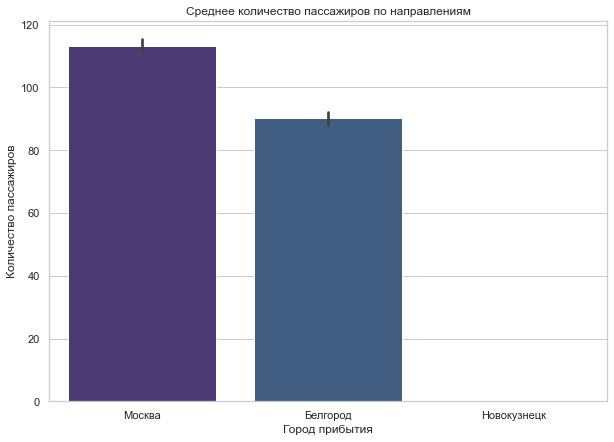

In [534]:
plt.figure(figsize=(10, 7))
sns.set_theme(style="whitegrid",palette='viridis')
ax = sns.barplot(x="arrival_city", y="sum_pass", data=df)
ax.set(xlabel='Город прибытия', ylabel='Количество пассажиров', title='Среднее количество пассажиров по направлениям',
       xticklabels=('Москва', 'Белгород', 'Новокузнецк'));

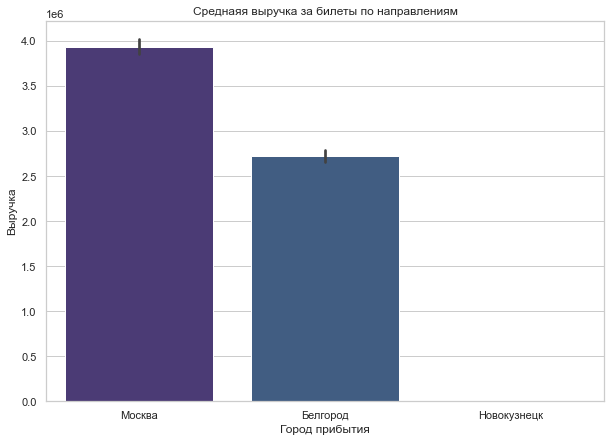

In [535]:
plt.figure(figsize=(10, 7))
sns.set_theme(style="whitegrid", palette='viridis')
ax = sns.barplot(x="arrival_city", y="revenue", data=df)


ax.set(xlabel='Город прибытия', ylabel='Выручка', title='Среднаяя выручка за билеты по направлениям',
       xticklabels=('Москва', 'Белгород', 'Новокузнецк'));

In [536]:
df[df['arrival_city']=='Novokuznetsk']

,flight_id,departure_city,arrival_city,model_aircraft,date,seat,business_seat,economy_pass,business_pass,sum_pass,flight_duration_minutes,revenue
5,136546,Anapa,Novokuznetsk,Boeing 737-300,2017-01-03,130,12,NaN,NaN,0,305,NaN
20,136523,Anapa,Novokuznetsk,Boeing 737-300,2017-01-10,130,12,NaN,NaN,0,305,NaN
35,136540,Anapa,Novokuznetsk,Boeing 737-300,2017-01-17,130,12,NaN,NaN,0,305,NaN
50,136560,Anapa,Novokuznetsk,Boeing 737-300,2017-01-24,130,12,NaN,NaN,0,305,NaN
65,136544,Anapa,Novokuznetsk,Boeing 737-300,2017-01-31,130,12,NaN,NaN,0,305,NaN
80,136514,Anapa,Novokuznetsk,Boeing 737-300,2017-02-07,130,12,NaN,NaN,0,305,NaN
95,136567,Anapa,Novokuznetsk,Boeing 737-300,2017-02-14,130,12,NaN,NaN,0,305,NaN
110,136511,Anapa,Novokuznetsk,Boeing 737-300,2017-02-21,130,12,NaN,NaN,0,305,NaN
125,136513,Anapa,Novokuznetsk,Boeing 737-300,2017-02-28,130,12,NaN,NaN,0,305,NaN


Глядя на графики можно сделать первый вывод о том что по направлению Анапа-Новокузнецк нет данных о количестве пассажиров. Судя по тому, что нет данных именно об одном из направлений, есть вероятно того, что при сборе данных произошла ошибка, и исправленные данные можно будет получить у заказчика. Но так как мы не имеем такой возможности от данных придется избавиться.

In [537]:
df.dropna(inplace=True)

#### Добавим информацию о заполняемости рейсов 

In [538]:
df['occupancy']=df['sum_pass']/df['seat']*100

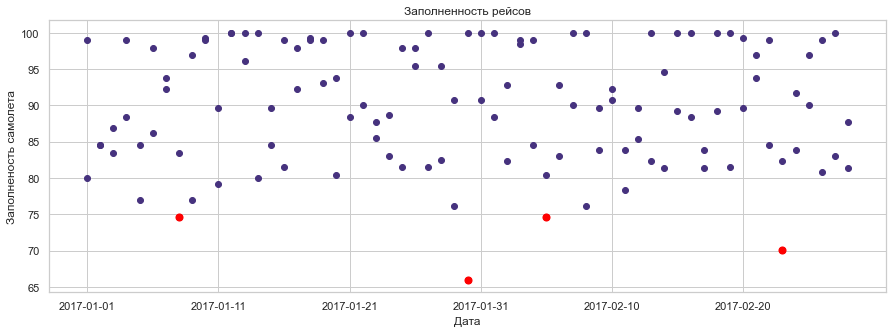

In [539]:
plt.figure(figsize=(15,5))
plt.scatter(df['date'], df['occupancy'])
plt.scatter(df[df['occupancy']<75]['date'], df[df['occupancy']<75]['occupancy'],color='red',s=50)
plt.xlabel('Дата')
plt.ylabel('Заполненость самолета')
plt.title('Заполненность рейсов')
plt.xticks(np.arange(0, 60, step=10.0));

In [540]:
df[df['occupancy']<75]

,flight_id,departure_city,arrival_city,model_aircraft,date,seat,business_seat,economy_pass,business_pass,sum_pass,flight_duration_minutes,revenue,occupancy
15,136122,Anapa,Moscow,Boeing 737-300,2017-01-08,130,12,87.0,10.0,97,100,3388400.0,74.615385
63,136642,Anapa,Belgorod,Sukhoi Superjet-100,2017-01-30,97,12,54.0,10.0,64,50,1892700.0,65.979381
75,136360,Anapa,Moscow,Boeing 737-300,2017-02-05,130,12,86.0,11.0,97,100,3439500.0,74.615385
115,136807,Anapa,Belgorod,Sukhoi Superjet-100,2017-02-23,97,12,60.0,8.0,68,50,2087000.0,70.103093


Предварительно определим уровень безубыточности для заполняемости равный 75% . Получили 4 рейса имеющих низкую заполняемость самолета.

#### Добавим информацию о расходах на топливо и общей выручке за рейс


#### Расход керосина для модели самолета (кг/ч):
SSJ-100---1700  
B737-300---2400  

In [541]:
df.loc[df['model_aircraft']=='Sukhoi Superjet-100','fuel_consumption']=1700/60*df['flight_duration_minutes']
df.loc[df['model_aircraft']=='Boeing 737-300','fuel_consumption']=2400/60*df['flight_duration_minutes']

#### Цены на авиа-керосин в 2017 году (за тонну)
Январь---41435 <br>
Февраль--39553<br>
Декабрь--47101

In [542]:
df['date']=pd.to_datetime(df['date'])
df.loc[df["date"].dt.month==1,'fuel_costs']=41435/1000*df['fuel_consumption']
df.loc[df["date"].dt.month==2,'fuel_costs']=39553/1000*df['fuel_consumption']
df.loc[df["date"].dt.month==12,'fuel_costs']=47101/1000*df['fuel_consumption']

In [543]:
df["delta"]=df['revenue']-df['fuel_costs']

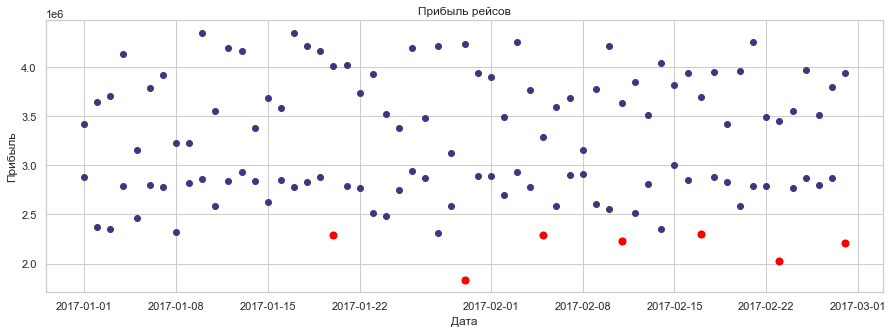

In [544]:
plt.figure(figsize=(15,5))
plt.scatter(df['date'], df['delta'])
plt.scatter(df[df['delta']<2300000]['date'], df[df['delta']<2300000]['delta'],color='red',s=50)
plt.xlabel('Дата')
plt.ylabel('Прибыль')
plt.title('Прибыль рейсов');


In [545]:
df[df['delta']<2300000]

,flight_id,departure_city,arrival_city,model_aircraft,date,seat,business_seat,economy_pass,business_pass,sum_pass,flight_duration_minutes,revenue,occupancy,fuel_consumption,fuel_costs,delta
42,136887,Anapa,Belgorod,Sukhoi Superjet-100,2017-01-20,97,12,70.0,8.0,78,50,2348400.0,80.412371,1416.666667,58699.583333,2.289700e+06
63,136642,Anapa,Belgorod,Sukhoi Superjet-100,2017-01-30,97,12,54.0,10.0,64,50,1892700.0,65.979381,1416.666667,58699.583333,1.834000e+06
76,136823,Anapa,Belgorod,Sukhoi Superjet-100,2017-02-05,97,12,68.0,10.0,78,50,2342100.0,80.412371,1416.666667,56033.416667,2.286067e+06
89,136922,Anapa,Belgorod,Sukhoi Superjet-100,2017-02-11,97,12,66.0,10.0,76,50,2289100.0,78.350515,1416.666667,56033.416667,2.233067e+06
102,136620,Anapa,Belgorod,Sukhoi Superjet-100,2017-02-17,97,12,70.0,9.0,79,50,2352100.0,81.443299,1416.666667,56033.416667,2.296067e+06
115,136807,Anapa,Belgorod,Sukhoi Superjet-100,2017-02-23,97,12,60.0,8.0,68,50,2087000.0,70.103093,1416.666667,56033.416667,2.030967e+06
126,136844,Anapa,Belgorod,Sukhoi Superjet-100,2017-02-28,97,12,73.0,6.0,79,50,2269100.0,81.443299,1416.666667,56033.416667,2.213067e+06


Согласно анализу прибыли "аутсайдерами" являются другие рейсы. Можно заметить, что все они имеют одинаковый признак  Города прибытия(Белгород) и Модель самолета(Sukhoi Superjet-100)

#### Посмотрим влияет ли день недели на среднюю заполняемость самолета

In [546]:
df['day_of_week']=df['date'].dt.dayofweek

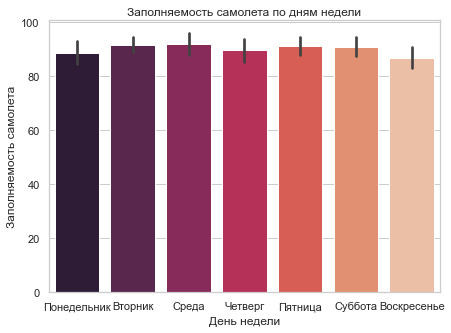

In [561]:
plt.figure(figsize=(7, 5))
ax=sns.barplot(x='day_of_week',y='occupancy',data=df,palette='rocket')
ax.set(xlabel='День недели', ylabel='Заполняемость самолета', title='Заполняемость самолета по дням недели',
       xticklabels=('Понедельник', 'Вторник','Среда','Четверг','Пятница','Суббота','Воскресенье'));

Нет существенной зависимости между днем недели и заполняемостью самолета

#### Посмотрим на прибыльность рейсов исходя из модели самолета или направления



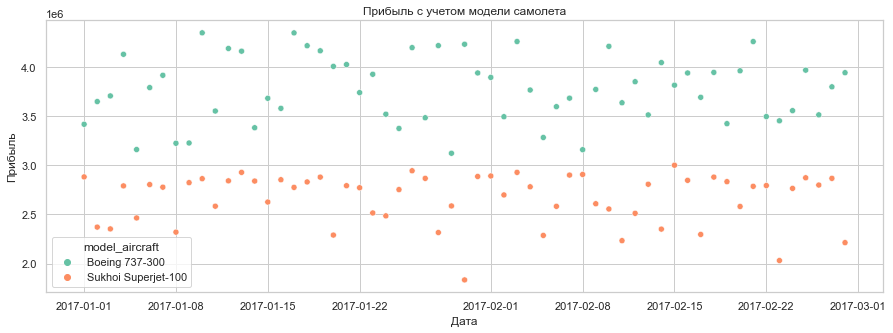

In [565]:
plt.figure(figsize=(15,5))
ax=sns.scatterplot(x=df['date'], y=df['delta'],hue=df['model_aircraft'],palette='Set2');
ax.set(xlabel='Дата', ylabel='Прибыль', title='Прибыль с учетом модели самолета');

Как мы можем видеть: более низкую прибыль демонстрируют все рейсы из Белгорода совершенные на самолете (Sukhoi Superjet-100). Принимая во внимание критерий заполняемости и полученной прибыли , предлагается признать низкоэффективными следующие рейсы:

In [549]:
df.query('model_aircraft == "Sukhoi Superjet-100" and occupancy<75 ')

,flight_id,departure_city,arrival_city,model_aircraft,date,seat,business_seat,economy_pass,business_pass,sum_pass,flight_duration_minutes,revenue,occupancy,fuel_consumption,fuel_costs,delta,day_of_week
63,136642,Anapa,Belgorod,Sukhoi Superjet-100,2017-01-30,97,12,54.0,10.0,64,50,1892700.0,65.979381,1416.666667,58699.583333,1.834000e+06,0
115,136807,Anapa,Belgorod,Sukhoi Superjet-100,2017-02-23,97,12,60.0,8.0,68,50,2087000.0,70.103093,1416.666667,56033.416667,2.030967e+06,3


### Выводы

1) Дата полета в зимнее время не играет существенной роли для прибыльности рейса <br>
2) Направление Анапа-Москва является более прибыльным чем Анапа-Белгород<br>
3) Для самолетов Sukhoi Superjet-100 безубыточной является заполняемость >70%<br>
4) Существенной разницы заполняемости самолета в зависимости от дня недели нет<br>
5) При текущем анализе трудно говорить об убыточности или прибыльности рейсов, так как не берется в расчет стоимость обслуживания самолетов, а так же зарплата экипажу<br>
